In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg #pip install pingouin # conda install -c conda-forge pingouin

In [5]:
data = pd.read_csv('iris.csv')

flowers = {0: 'setosa',
           1: 'virsicolor',
           2: 'virginica'}

data['target'] = data['target'].map(flowers)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                object
dtype: object

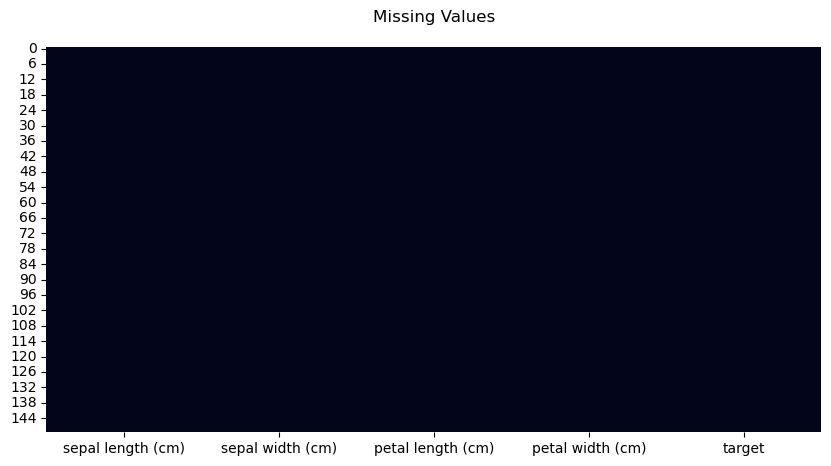

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(data.isnull(), cbar=False)
plt.show()

data.isnull().sum()

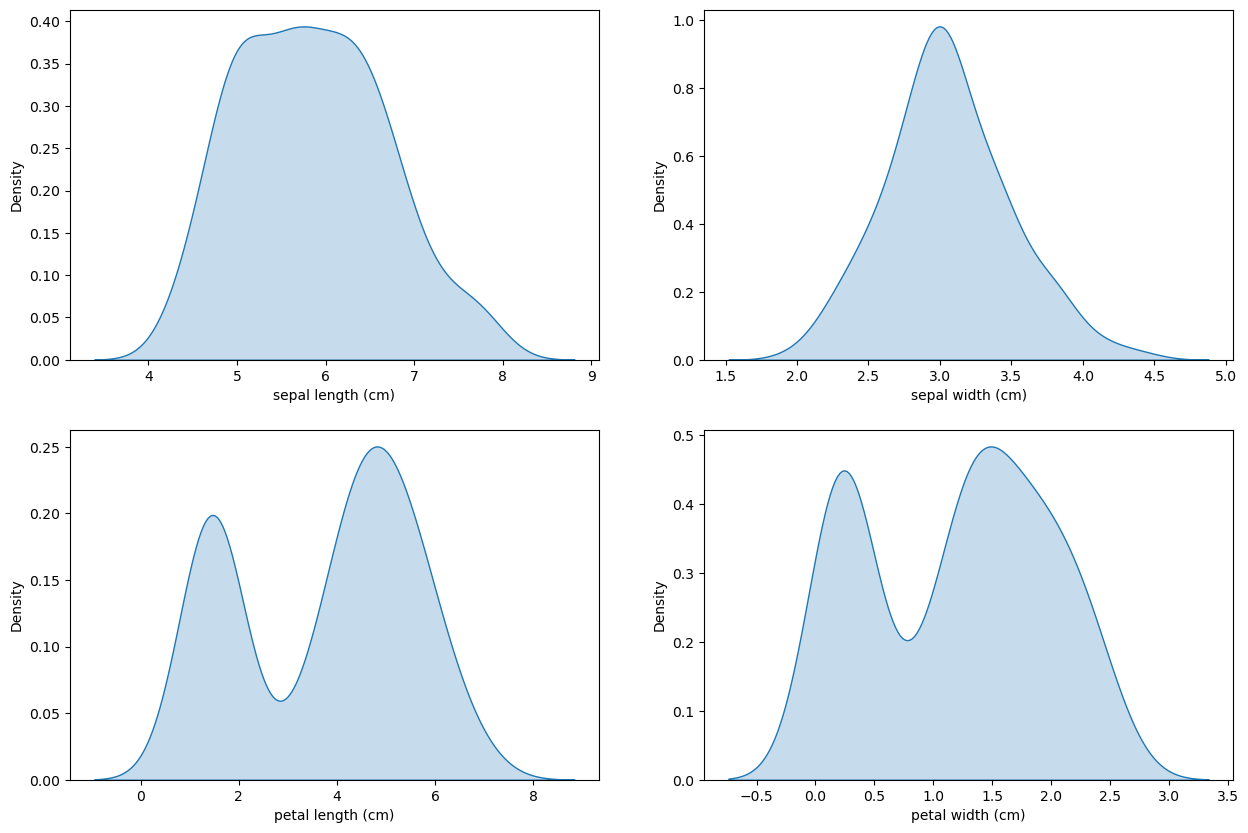

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(data.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=data, x=col, fill=True)
plt.show()

data.describe()

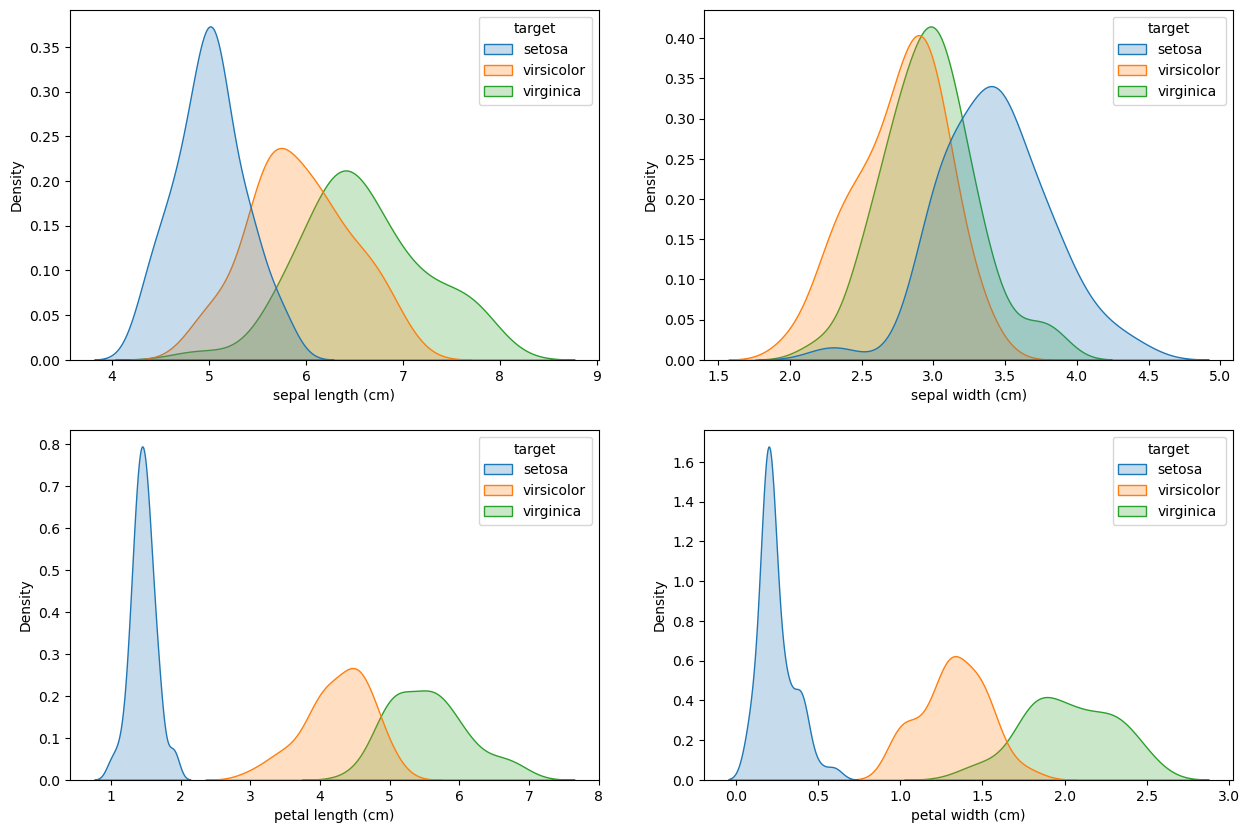

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
target                                                                     
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   
virsicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   

           sepal width (cm)                                                
                      count   mean       std  min    25%  50%    75%  max  
target                                                                     
setosa                 50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4  
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8  
virsicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4

petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
target                                                                      
setosa                  50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   
virsicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
target                                                                 
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  
virsicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=data, x=col, fill=True, hue='target')
plt.show()

display(data[['sepal length (cm)', 'sepal width (cm)', 'target']].groupby('target').describe())
data[['petal length (cm)', 'petal width (cm)', 'target']].groupby('target').describe()

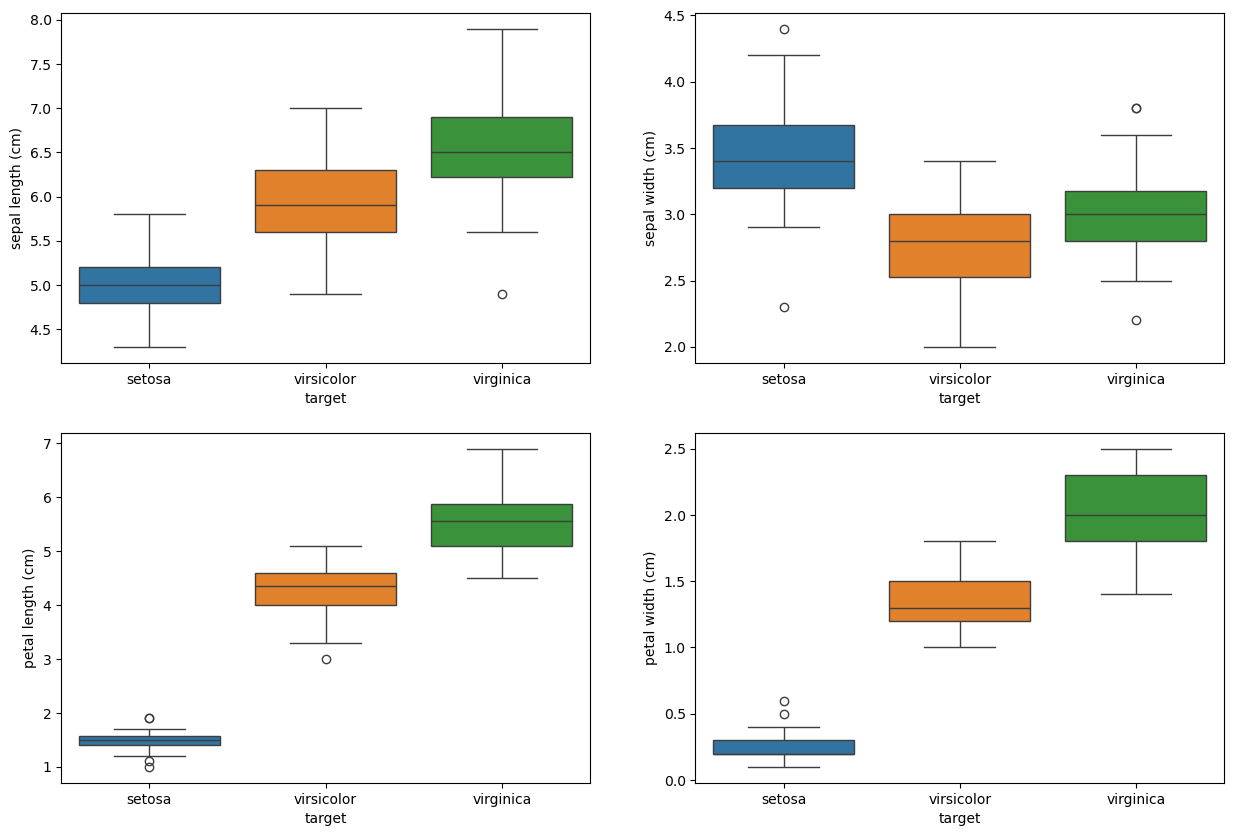

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(float)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x='target', y=col, hue = 'target')
plt.show()

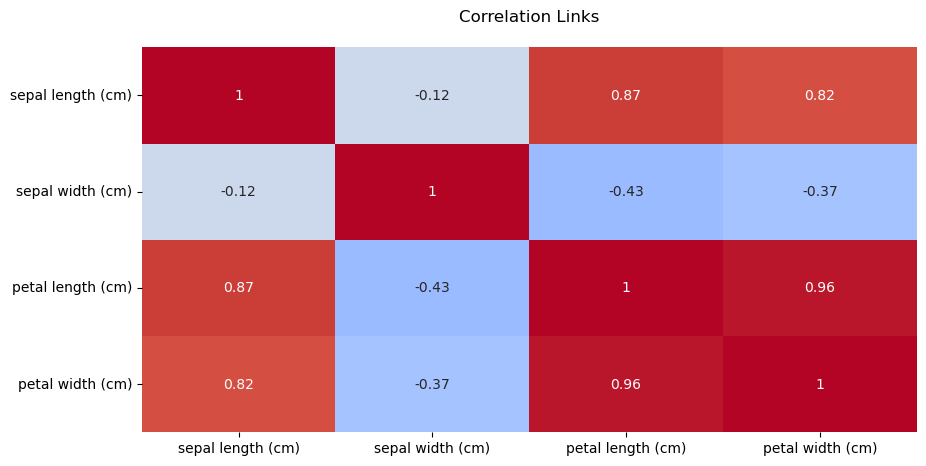

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')
sns.heatmap(data.select_dtypes(float).corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True)
plt.show()


In [33]:
# Test normality
for col in data.select_dtypes(float):
    print(col)
    display(pg.normality(data=data, dv=col, group='target'))
    print('\n')


sepal length (cm)


,W,pval,normal
target,,,
setosa,0.977698,0.459501,True
virsicolor,0.977836,0.464738,True
virginica,0.971179,0.258313,True




sepal width (cm)


,W,pval,normal
target,,,
setosa,0.971719,0.271513,True
virsicolor,0.974133,0.337984,True
virginica,0.967391,0.180899,True




petal length (cm)


,W,pval,normal
target,,,
setosa,0.954977,0.054811,True
virsicolor,0.966004,0.158476,True
virginica,0.962186,0.109775,True




petal width (cm)


,W,pval,normal
target,,,
setosa,0.799765,8.658606e-07,False
virsicolor,0.947627,2.727822e-02,False
virginica,0.959771,8.695303e-02,True


In [35]:
# Test homoscedasticity
for col in data.select_dtypes(float):
    print(col)
    display(pg.homoscedasticity(data=data, dv=col, group='target'))
    print('\n')

sepal length (cm)


,W,pval,equal_var
levene,6.35272,0.002259,False




sepal width (cm)


,W,pval,equal_var
levene,0.590212,0.555518,True




petal length (cm)


,W,pval,equal_var
levene,19.480339,3.128757e-08,False




petal width (cm)


,W,pval,equal_var
levene,19.892439,2.260520e-08,False


In [37]:
# Normality is ok but variance are not equals => welch anova
for col in data.select_dtypes(float):
    print(col)
    display(pg.welch_anova(data=data, dv=col, between='target'))
    print('\n')

sepal length (cm)


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,92.211145,138.908285,1.505059e-28,0.618706




sepal width (cm)


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.401587,45.012035,1.432735e-14,0.400783




petal length (cm)


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,78.072955,1828.091945,2.693327e-66,0.941372




petal width (cm)


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,84.951254,1276.884565,4.138739e-64,0.928883


In [ ]:
# Post hoc test with welch anova => games howell
for col in data.select_dtypes(float):
    print(col)
    display(pg.pairwise_gameshowell(data=data, dv=col, between='target'))
    print('\n')

sepal length (cm)


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,virginica,5.006,6.588,-1.582,0.102819,-15.386196,76.515867,0.001,-3.053629
1,setosa,virsicolor,5.006,5.936,-0.930,0.088395,-10.520986,86.538002,0.001,-2.088053
2,virginica,virsicolor,6.588,5.936,0.652,0.115825,5.629165,94.025486,0.001,1.117195




sepal width (cm)


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,virginica,3.428,2.974,0.454,0.070384,6.450349,95.547235,0.001000,1.280172
1,setosa,virsicolor,3.428,2.770,0.658,0.069593,9.454976,94.697774,0.001000,1.876486
2,virginica,virsicolor,2.974,2.770,0.204,0.063635,3.205761,97.926827,0.005127,0.636233




petal length (cm)


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,virginica,1.462,5.552,-4.090,0.081823,-49.986186,58.609395,0.001,-9.920532
1,setosa,virsicolor,1.462,4.260,-2.798,0.070849,-39.492719,62.139768,0.001,-7.837941
2,virginica,virsicolor,5.552,4.260,1.292,0.102509,12.603779,95.570435,0.001,2.501415




petal width (cm)


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,virginica,0.246,2.026,-1.78,0.041603,-42.785798,63.122624,0.001,-8.491504
1,setosa,virsicolor,0.246,1.326,-1.08,0.031690,-34.080342,74.754695,0.001,-6.763771
2,virginica,virsicolor,2.026,1.326,0.70,0.047862,14.625367,89.043375,0.001,2.902630
